In [1]:
import copy
import numpy as np
import pandas as pd
import scipy.stats
import dftools
import matplotlib.pyplot as plt
from tqdm.auto import tqdm

Welcome to JupyROOT 6.18/00


In [2]:
plt.style.use("cms")

In [3]:
#_df_data = pd.read_hdf("data/fit_inputs_12metbins_5jptbins_2d.h5", "Data")
#_df_mc = pd.read_hdf("data/fit_inputs_12metbins_5jptbins_2d.h5", "MC")
#_df_mc_smooth = pd.read_hdf("data/fit_inputs_12metbins_5jptbins_2d.h5", "MCSmooth")
#_df_mc_p4 = pd.read_hdf("data/fit_inputs_12metbins_5jptbins_2d.h5", "MCPoly4")
#_df_mc_flat = pd.read_hdf("data/fit_inputs_12metbins_5jptbins_2d.h5", "MCFlat")

#_df_data = pd.read_hdf("data/fit_inputs_12metbins_10jptbins_2d.h5", "Data")
#_df_mc = pd.read_hdf("data/fit_inputs_12metbins_10jptbins_2d.h5", "MC")
#_df_mc_smooth = pd.read_hdf("data/fit_inputs_12metbins_10jptbins_2d.h5", "MCSmooth")
#_df_mc_p4 = pd.read_hdf("data/fit_inputs_12metbins_10jptbins_2d.h5", "MCPoly4")
#_df_mc_flat = pd.read_hdf("data/fit_inputs_12metbins_10jptbins_2d.h5", "MCFlat")

#_df_data = pd.read_hdf("data/fit_inputs_25metbins_10jptbins_2d.h5", "Data")
#_df_mc = pd.read_hdf("data/fit_inputs_25metbins_10jptbins_2d.h5", "MC")
#_df_mc_smooth = pd.read_hdf("data/fit_inputs_25metbins_10jptbins_2d.h5", "MCSmooth")
#_df_mc_p4 = pd.read_hdf("data/fit_inputs_25metbins_10jptbins_2d.h5", "MCPoly4")
#_df_mc_flat = pd.read_hdf("data/fit_inputs_25metbins_10jptbins_2d.h5", "MCFlat")

#_df_data = pd.read_hdf("data/fit_inputs_19metbins_10jptbins_2d.h5", "Data")
#_df_mc = pd.read_hdf("data/fit_inputs_19metbins_10jptbins_2d.h5", "MC")
#_df_mc_smooth = pd.read_hdf("data/fit_inputs_19metbins_10jptbins_2d.h5", "MCSmooth")
#_df_mc_p4 = pd.read_hdf("data/fit_inputs_19metbins_10jptbins_2d.h5", "MCPoly4")
#_df_mc_flat = pd.read_hdf("data/fit_inputs_19metbins_10jptbins_2d.h5", "MCFlat")

_df_data = pd.read_hdf("data/fit_inputs_19metbins_10jptbins_2d_v2.h5", "Data")
_df_mc = pd.read_hdf("data/fit_inputs_19metbins_10jptbins_2d_v2.h5", "MC")
_df_mc_smooth = pd.read_hdf("data/fit_inputs_19metbins_10jptbins_2d_v2.h5", "MCSmoothv2")
_df_mc_p4 = pd.read_hdf("data/fit_inputs_19metbins_10jptbins_2d_v2.h5", "MCPoly4")
_df_mc_flat = pd.read_hdf("data/fit_inputs_19metbins_10jptbins_2d_v2.h5", "MCFlat")

_df_data = _df_data.loc[~_df_data.index.duplicated(keep="first")]
_df_mc = _df_mc.loc[~_df_mc.index.duplicated(keep="first")]
_df_mc_smooth = _df_mc_smooth.loc[~_df_mc_smooth.index.duplicated(keep="first")]
_df_mc_p4 = _df_mc_p4.loc[~_df_mc_p4.index.duplicated(keep="first")]
_df_mc_flat = _df_mc_flat.loc[~_df_mc_flat.index.duplicated(keep="first")]

In [4]:
_df_mc.loc[_df_mc["sum_w"]<0., "sum_w"] = 1e-10
_df_mc_smooth.loc[_df_mc["sum_w"]<0., "sum_w"] = 1e-10
_df_mc_p4.loc[_df_mc["sum_w"]<0., "sum_w"] = 1e-10
_df_mc_flat.loc[_df_mc["sum_w"]<0., "sum_w"] = 1e-10

/home/hep/sdb15/miniconda2/envs/zinv37/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2855: PerformanceWarning: indexing past lexsort depth may impact performance.
  raw_cell, store_history, silent, shell_futures)


In [5]:
_df_mc.index.get_level_values("region").unique()


Index(['Monojet', 'MonojetQCD', 'SingleElectronQCD', 'SingleMuonMuQCD',
       'SingleMuonQCD'],
      dtype='object', name='region')

In [6]:
_df_data.index.names = ["region", "trigger", "bin0_min", "bin0_max", "bin1_min", "bin1_max"]
_df_data = _df_data.reorder_levels(["trigger", "region", "bin0_min", "bin0_max", "bin1_min", "bin1_max"]).sort_index()
_df_data.head(5)


count     sum_w  \
trigger region  bin0_min bin0_max bin1_min bin1_max                       
MET     Monojet 200.0    220.0    40.0     140.0     183761.0  183761.0   
                                  140.0    240.0     213817.0  213817.0   
                                  240.0    340.0      41816.0   41816.0   
                                  340.0    440.0       8742.0    8742.0   
                                  440.0    540.0       3441.0    3441.0   

                                                       sum_ww  
trigger region  bin0_min bin0_max bin1_min bin1_max            
MET     Monojet 200.0    220.0    40.0     140.0     183761.0  
                                  140.0    240.0     213817.0  
                                  240.0    340.0      41816.0  
                                  340.0    440.0       8742.0  
                                  440.0    540.0       3441.0

In [7]:
bin_min = _df_data.loc[("MET", "MonojetQCD")].unstack().unstack().index.get_level_values("bin0_min").values
bin_max = _df_data.loc[("MET", "MonojetQCD")].unstack().unstack().index.get_level_values("bin0_min").values
met_bins = bin_min
met_bins

array([200., 220., 250., 280., 310., 340., 370., 400., 430., 470., 510.,
       550., 590., 640., 690., 740., 790., 840., 900.])

## Modify dataframes

Alter the dataframes, for example, to make or break correlations between systematic uncertainties, remove variations from particular sources, or switch to polyfit smoothing or a flat systematic

### Rename nuisances

In [8]:
region_mapping = {
    "MonojetQCD": {
        "metTrigMuonMultiplicitySyst": "metTrig0MuSyst",
        "metTrigRegionSyst": "metTrig{region}Syst",
    },
    "SingleMuonQCD": {
        "metTrigMuonMultiplicitySyst": "metTrig1MuSyst",
        "metTrigRegionSyst": "metTrig{region}Syst",
    },
}

for region, mapping in region_mapping.items():
    selection = (_df_mc.index.get_level_values("variation")=="") & (_df_mc.index.get_level_values("region")==region)
    tdf = _df_mc.loc[selection,:]
    
    selection = (_df_mc.index.get_level_values("variation").str.endswith("Up")) & (_df_mc.index.get_level_values("region")==region)
    tdf_up = _df_mc.loc[selection,:].rename(
        level="variation",
        index={k+"Up": v.format(region=region)+"Up" for k, v in mapping.items()},
    )
    
    selection = (_df_mc.index.get_level_values("variation").str.endswith("Down")) & (_df_mc.index.get_level_values("region")==region)
    tdf_do = _df_mc.loc[selection,:].rename(
        level="variation",
        index={k+"Down": v.format(region=region)+"Down" for k, v in mapping.items()},
    )
    _df_mc = pd.concat([tdf, tdf_up, tdf_do, _df_mc.loc[_df_mc.index.get_level_values("region")!=region,:].copy()], axis=0, sort=False)


## Remove nuisances

In [9]:
region_process_variations = {
    ("MonojetQCD", "QCD"): [],
    ("MonojetQCD", "WJetsToLNu"): [
        "lheScaleWeight", "muonTrig", "eleTrig", "metTrig0MuSyst", "metTrigMonojetQCDSyst",
    ],
    ("MonojetQCD", "ZJetsToNuNu"): [
        "lheScaleWeight", "muonTrig", "eleTrig", "metTrig0MuSyst", "metTrigMonojetQCDSyst",
    ],
    ("MonojetQCD", "MinorBkgs"): [
        "muonTrig", "eleTrig", "d1kqcd", "d2kqcd", "d3kqcd", "dkmix", "d1kew", "d2keww",
        "d2kewz", "d3keww", "d3kewz", "lhePdfWeight", "tauIdTight", "metTrig0MuSyst",
        "metTrigMonojetQCDSyst", "lheScaleWeight",
    ],
    ("SingleMuonQCD", "WJetsToLNu"): [
        "lheScaleWeight", "eleTrig",
    ],
    ("SingleMuonQCD", "QCD"): [
        "eleTrig", "d1kqcd", "d2kqcd", "d3kqcd", "dkmix", "d1kew", "d2keww", "d2kewz",
        "d3keww", "d3kewz",
    ],
    ("SingleMuonQCD", "MinorBkgs"): [
        "eleTrig", "d1kqcd", "d2kqcd", "d3kqcd", "dkmix", "d1kew", "d2keww", "d2kewz",
        "d3keww", "d3kewz", "tauIdVLoose",
    ],
    ("SingleElectronQCD", "WJetsToLNu"): [
        "lheScaleWeight", "muonTrig",
    ],
    ("SingleElectronQCD", "MinorBkgs"): [
        "muonTrig", "d1kqcd", "d2kqcd", "d3kqcd", "dkmix", "d1kew", "d2keww", "d2kewz",
        "d3keww", "d3kewz", "lhePdfWeight",
    ],
}
    
drops = [
    (r, p, v+"Up")
    for (r, p), vs in region_process_variations.items()
    for v in vs
] + [
    (r, p, v+"Down")
    for (r, p), vs in region_process_variations.items()
    for v in vs
]
_df_mc = _df_mc.drop(drops, errors='ignore')

/home/hep/sdb15/miniconda2/envs/zinv37/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: PerformanceWarning: indexing past lexsort depth may impact performance.
  interactivity=interactivity, compiler=compiler, result=result)


## Use gaussian filter smoothing

In [10]:
vjets = [
    "lhePdfWeight", "jesTotal", "jerSF", "unclust", "eleIdIsoVeto", "eleIdIsoTight", "eleReco", "eleTrig", "muonIdLooseSyst", "muonIdLooseStat", "muonIdTightSyst",
    "muonIdTightStat", "muonIsoLooseSyst", "muonIsoLooseStat", "photonIdLoose", "photonPixelSeedVeto", "pileup", "prefiring", "tauIdTight", "tauIdVLoose", "btagSF",
]
minor_bkgs = [
    "lhePdfWeight", "lheScaleWeight", "eleIdIsoVeto", "eleIdIsoTight", "eleReco", "eleTrig", "muonIdLooseSyst", "muonIdLooseStat", "muonIdTightSyst", "muonIdTightStat",
    "muonIsoLooseSyst", "muonIsoLooseStat", "photonIdLoose", "photonPixelSeedVeto", "pileup", "prefiring", "tauIdTight", "tauIdVLoose",
]
qcd = [
    "eleIdIsoVeto", "eleIdIsoTight", "eleReco", "eleTrig", "muonIdLooseSyst", "muonIdLooseStat", "muonIdTightSyst", "muonIdTightStat", "muonIsoLooseSyst",
    "muonIsoLooseStat", "photonIdLoose", "photonPixelSeedVeto", "pileup", "prefiring", "tauIdTight", "tauIdVLoose",
]

region_process_variations = {
    ("MonojetQCD", "QCD"): vjets,
    ("MonojetQCD", "WJetsToLNu"): vjets,
    ("MonojetQCD", "ZJetsToNuNu"): vjets,
    ("MonojetQCD", "MinorBkgs"): minor_bkgs,
    ("SingleMuonQCD", "WJetsToLNu"): vjets,
    ("SingleMuonQCD", "MinorBkgs"): minor_bkgs,
    ("SingleMuonQCD", "QCD"): qcd,
    ("SingleElectronQCD", "WJetsToLNu"): vjets,
    ("SingleElectronQCD", "MinorBkgs"): minor_bkgs,
}
    
for (region, process), variations in region_process_variations.items():
    for variation in variations:
        for vtype in ["Up", "Down"]:
            try:
                _df_mc.loc[
                    (region, process, variation+vtype, pd.IndexSlice[:]), :
                ] = _df_mc_smooth.loc[
                    (region, process, variation+vtype, pd.IndexSlice[:]), :
                ]
            except KeyError:
                pass


/home/hep/sdb15/miniconda2/envs/zinv37/lib/python3.7/site-packages/IPython/core/async_helpers.py:68: PerformanceWarning: indexing past lexsort depth may impact performance.
  coro.send(None)


## Use polyfit smoothing

In [11]:
wjets = [
    "d1kqcd", "d2kqcd", "d3kqcd", "d1kew", "d2keww", "d3keww", "dkmix",
]

region_process_variations = {
    ("SingleMuonQCD", "WJetsToLNu"): wjets,
    ("SingleElectronQCD", "WJetsToLNu"): wjets,
}

for (region, process), variations in region_process_variations.items():
    for variation in variations:
        for vtype in ["Up", "Down"]:
            try:
                _df_mc.loc[
                    (region, process, variation+vtype, pd.IndexSlice[:]), :
                ] = _df_mc_p4.loc[
                    (region, process, variation+vtype, pd.IndexSlice[:]), :
                ]
            except KeyError:
                pass


## Use flat systematic


In [12]:
qcd = ["jesTotal", "jerSF", "unclust", "pileup", "eleReco", "btagSF"]
minors = ["lheScaleWeight", "jesTotal", "jerSF", "unclust", "pileup", "eleIdIsoTight", "btagSF"]

process_variations = {
    ("MonojetQCD", "MinorBkgs"): minors,
    ("SingleMuonQCD", "MinorBkgs"): minors,
    ("SingleMuonQCD", "QCD"): qcd,
    ("SingleElectronQCD", "MinorBkgs"): minors,
}

for (region, process), variations in process_variations.items():
    for variation in variations:
        for vtype in ["Up", "Down"]:
            try:
                _df_mc.loc[
                    (region, process, variation+vtype, pd.IndexSlice[:]), :
                ] = _df_mc_flat.loc[
                    (region, process, variation+vtype, pd.IndexSlice[:]), :
                ]
            except KeyError:
                pass

In [13]:
selection = [
    ("MET", 'MonojetQCD'),
    ("MET", 'SingleMuonQCD'),
    ("SingleElectron", 'SingleElectronQCD'),
]
df_data = _df_data.unstack().unstack().unstack().unstack().loc[selection].stack().stack().stack().stack().reset_index("trigger", drop=True)
df_data.head(5)

count     sum_w    sum_ww
region     bin0_min bin0_max bin1_min bin1_max                              
MonojetQCD 200.0    220.0    40.0     140.0     957182.0  957182.0  957182.0
                             140.0    240.0     801062.0  801062.0  801062.0
                             240.0    340.0     324974.0  324974.0  324974.0
                             340.0    440.0     124250.0  124250.0  124250.0
                             440.0    540.0      55235.0   55235.0   55235.0

In [14]:
df_mc = _df_mc.copy(deep=True)
df_mc.head(5)

sum_w  \
region        process   variation bin0_min bin0_max bin1_min bin1_max                
SingleMuonQCD MinorBkgs           200.0    220.0    40.0     140.0     4749.924090   
                                                    140.0    240.0     1725.676303   
                                                    240.0    340.0      546.490098   
                                                    340.0    440.0      155.173557   
                                                    440.0    540.0       57.073711   

                                                                             sum_ww  
region        process   variation bin0_min bin0_max bin1_min bin1_max                
SingleMuonQCD MinorBkgs           200.0    220.0    40.0     140.0     15363.060497  
                                                    140.0    240.0      5344.935767  
                                                    240.0    340.0      1740.239111  
                                                    340.0    440.0       415.876749  
                                                    440.0    540.0       104.512135

In [15]:
df_mc.loc[:,"sum_w"] = np.maximum(df_mc["sum_w"], 1e-10)

In [16]:
monojetqcd = df_data.loc[("MonojetQCD")]
singlemuonqcd = df_data.loc[("SingleMuonQCD")]
singleelectronqcd = df_data.loc[("SingleElectronQCD")]
monojetqcd["region"] = "MonojetQCD"
monojetqcd = monojetqcd.reset_index().set_index(["region", "bin0_min", "bin0_max", "bin1_min", "bin1_max"]).sort_index()

singlemuonqcd = singlemuonqcd.groupby(["bin0_min", "bin0_max"]).sum()
singlemuonqcd["region"] = "SingleMuonQCD"
singlemuonqcd["bin1_min"] = 40.
singlemuonqcd["bin1_max"] = 1040.
singlemuonqcd = singlemuonqcd.reset_index().set_index(["region", "bin0_min", "bin0_max", "bin1_min", "bin1_max"]).sort_index()

singleelectronqcd = singleelectronqcd.groupby(["bin0_min", "bin0_max"]).sum()
singleelectronqcd["region"] = "SingleElectronQCD"
singleelectronqcd["bin1_min"] = 40.
singleelectronqcd["bin1_max"] = 1040.
singleelectronqcd = singleelectronqcd.reset_index().set_index(["region", "bin0_min", "bin0_max", "bin1_min", "bin1_max"]).sort_index()

df_data = pd.concat([monojetqcd, singlemuonqcd, singleelectronqcd], axis=0)
df_data.head(5)

/home/hep/sdb15/miniconda2/envs/zinv37/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


count     sum_w    sum_ww
region     bin0_min bin0_max bin1_min bin1_max                              
MonojetQCD 200.0    220.0    40.0     140.0     957182.0  957182.0  957182.0
                             140.0    240.0     801062.0  801062.0  801062.0
                             240.0    340.0     324974.0  324974.0  324974.0
                             340.0    440.0     124250.0  124250.0  124250.0
                             440.0    540.0      55235.0   55235.0   55235.0

In [17]:
monojetqcd = df_mc.loc[("MonojetQCD")]
singlemuonqcd = df_mc.loc[("SingleMuonQCD")]
singleelectronqcd = df_mc.loc[("SingleElectronQCD")]
monojetqcd["region"] = "MonojetQCD"
monojetqcd = monojetqcd.reset_index().set_index(["region", "process", "variation", "bin0_min", "bin0_max", "bin1_min", "bin1_max"]).sort_index()

singlemuonqcd = singlemuonqcd.groupby(["process", "variation", "bin0_min", "bin0_max"]).sum()
singlemuonqcd["region"] = "SingleMuonQCD"
singlemuonqcd["bin1_min"] = 40.
singlemuonqcd["bin1_max"] = 1040.
singlemuonqcd = singlemuonqcd.reset_index().set_index(["region", "process", "variation", "bin0_min", "bin0_max", "bin1_min", "bin1_max"]).sort_index()

singleelectronqcd = singleelectronqcd.groupby(["process", "variation", "bin0_min", "bin0_max"]).sum()
singleelectronqcd["region"] = "SingleElectronQCD"
singleelectronqcd["bin1_min"] = 40.
singleelectronqcd["bin1_max"] = 1040.
singleelectronqcd = singleelectronqcd.reset_index().set_index(["region", "process", "variation", "bin0_min", "bin0_max", "bin1_min", "bin1_max"]).sort_index()

df_mc = pd.concat([monojetqcd, singlemuonqcd, singleelectronqcd], axis=0)
df_mc.head(5)

/home/hep/sdb15/miniconda2/envs/zinv37/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


sum_w  \
region     process   variation bin0_min bin0_max bin1_min bin1_max                 
MonojetQCD MinorBkgs           200.0    220.0    40.0     140.0     14856.887798   
                                                 140.0    240.0      5588.423286   
                                                 240.0    340.0      1980.399946   
                                                 340.0    440.0       669.939930   
                                                 440.0    540.0       350.766491   

                                                                          sum_ww  
region     process   variation bin0_min bin0_max bin1_min bin1_max                
MonojetQCD MinorBkgs           200.0    220.0    40.0     140.0     41543.892343  
                                                 140.0    240.0     17311.822197  
                                                 240.0    340.0      6466.804151  
                                                 340.0    440.0      2172.671551  
                                                 440.0    540.0      1253.654684

## Run fits

In [18]:
df_mc.index.get_level_values("variation").unique()

Index(['', 'btagSFDown', 'btagSFUp', 'eleEnergyScaleDown', 'eleEnergyScaleUp',
       'eleIdIsoTightDown', 'eleIdIsoTightUp', 'eleIdIsoVetoDown',
       'eleIdIsoVetoUp', 'eleRecoDown', 'eleRecoUp', 'jerSFDown', 'jerSFUp',
       'jesTotalDown', 'jesTotalUp', 'lumiDown', 'lumiUp',
       'metTrigReferenceTriggerSystDown', 'metTrigReferenceTriggerSystUp',
       'muonIdLooseStatDown', 'muonIdLooseStatUp', 'muonIdLooseSystDown',
       'muonIdLooseSystUp', 'muonIdTightStatDown', 'muonIdTightStatUp',
       'muonIdTightSystDown', 'muonIdTightSystUp', 'muonIsoLooseStatDown',
       'muonIsoLooseStatUp', 'muonIsoLooseSystDown', 'muonIsoLooseSystUp',
       'muonIsoTightStatDown', 'muonIsoTightStatUp', 'muonIsoTightSystDown',
       'muonIsoTightSystUp', 'muonPtScaleDown', 'muonPtScaleUp',
       'photonEnergyScaleDown', 'photonEnergyScaleUp', 'photonIdLooseDown',
       'photonIdLooseUp', 'photonPixelSeedVetoDown', 'photonPixelSeedVetoUp',
       'pileupDown', 'pileupUp', 'prefiringDown', '

## Create a single combined config

In [19]:
regions = {
    "MonojetQCD": ["QCD", "ZJetsToNuNu", "WJetsToLNu", "MinorBkgs"],
    "SingleMuonQCD": ["WJetsToLNu", "MinorBkgs"],
    "SingleElectronQCD": ["WJetsToLNu", "MinorBkgs"],
}
parameters = []
for idx in range(len(met_bins)):
    parameters.extend([
        {"name": 'rQCDNorm_b{}'.format(idx),  "value": 1., "limit": (-100, 100), "fixed": False, "constraint": "free"},
        {"name": 'rQCDShape_b{}'.format(idx), "value": 0., "limit": (-100, 100), "fixed": False, "constraint": "free"},
    ])

fqcd_normarr = (
    "np.array(["
    +",".join(["p['rQCDNorm_b{}']".format(idx) for idx in range(len(met_bins))])
    +"])[:,np.newaxis]"
)
fqcd_shapearr = (
    "np.array(["
    +",".join(["p['rQCDShape_b{}']".format(idx) for idx in range(len(met_bins))])
    +"])[:,np.newaxis]"
)
fqcd = "{} + {}*((x-p['ptSRLoc'])*((w.sum(axis=1))/((x*w).sum(axis=1)))[:,np.newaxis])".format(fqcd_normarr, fqcd_shapearr)

scale_functions = {
    ("MonojetQCD",        "ZJetsToNuNu"): "x, y, w, p: p['rZJetsToNuNu']*np.ones_like(x)",
    ("MonojetQCD",        "WJetsToLNu"):  "x, y, w, p: p['rWJetsToLNu']*np.ones_like(x)",
    ("SingleMuonQCD",     "WJetsToLNu"):  "x, y, w, p: p['rWJetsToLNu']*np.ones_like(x)",
    ("SingleElectronQCD", "WJetsToLNu"):  "x, y, w, p: p['rWJetsToLNu']*np.ones_like(x)",
    ("MonojetQCD",        "QCD"):         "x, y, w, p: {}".format(fqcd),
}
    
config ={
    "regions": regions,
    "parameters": parameters + [
        {"name": "rZJetsToNuNu", "value": 1.,  "limit": (0, 10),     "fixed": False, "constraint": "free"},
        {"name": "rWJetsToLNu",  "value": 1.,  "limit": (0, 10),     "fixed": False, "constraint": "free"},
        {"name": "ptSRLoc",      "value": 20., "limit": (0, 10), "fixed": True,  "constraint": "free"},
        
        #{"name": "metTrig0MuSyst",              "value": 0., "limit": (-3., 3.), "fixed": False, "constraint": "gaussian"},
        {"name": "metTrig1MuSyst",              "value": 0., "limit": (-10, 10), "fixed": False, "constraint": "gaussian"},
        {"name": "metTrig2MuSyst",              "value": 0., "limit": (-10, 10), "fixed": False, "constraint": "gaussian"},
        {"name": "metTrigReferenceTriggerSyst", "value": 0., "limit": (-10, 10), "fixed": False, "constraint": "gaussian"},
    ] + [
        {"name": "metTrig{}Syst".format(r), "value": 0., "limit": (-10, 10), "fixed": False, "constraint": "gaussian"}
        for r in ["MonojetQCD", "SingleMuonQCD", "DoubleMuonQCD"]
        if any(r in x for x in regions.keys())
    ] + [
        {"name": "muonIdLooseSyst",  "value": 0., "limit": (-10, 10), "fixed": False, "constraint": "gaussian"},
        {"name": "muonIdLooseStat",  "value": 0., "limit": (-10, 10), "fixed": False, "constraint": "gaussian"},
        {"name": "muonIdTightSyst",  "value": 0., "limit": (-10, 10), "fixed": False, "constraint": "gaussian"},
        {"name": "muonIdTightStat",  "value": 0., "limit": (-10, 10), "fixed": False, "constraint": "gaussian"},
        {"name": "muonIsoLooseSyst", "value": 0., "limit": (-10, 10), "fixed": False, "constraint": "gaussian"},
        {"name": "muonIsoLooseStat", "value": 0., "limit": (-10, 10), "fixed": False, "constraint": "gaussian"},
        {"name": "muonIsoTightSyst", "value": 0., "limit": (-10, 10), "fixed": False, "constraint": "gaussian"},
        {"name": "muonIsoTightStat", "value": 0., "limit": (-10, 10), "fixed": False, "constraint": "gaussian"},
        #{"name": "muonTrig",         "value": 0., "limit": (-3., 3.), "fixed": False, "constraint": "gaussian"},
        #{"name": "muonPtScale",      "value": 0., "limit": (-3., 3.), "fixed": False, "constraint": "gaussian"},
        
        {"name": "eleIdIsoTight",  "value": 0., "limit": (-10, 10), "fixed": False, "constraint": "gaussian"},
        {"name": "eleIdIsoVeto",   "value": 0., "limit": (-10, 10), "fixed": False, "constraint": "gaussian"},
        {"name": "eleReco",        "value": 0., "limit": (-10, 10), "fixed": False, "constraint": "gaussian"},
        {"name": "eleTrig",        "value": 0., "limit": (-10, 10), "fixed": False, "constraint": "gaussian"},
        #{"name": "eleEnergyScale", "value": 0., "limit": (-3., 3.), "fixed": False, "constraint": "gaussian"},
        
        {"name": "photonIdLoose",       "value": 0., "limit": (-10, 10), "fixed": False, "constraint": "gaussian"},
        {"name": "photonPixelSeedVeto", "value": 0., "limit": (-10, 10), "fixed": False, "constraint": "gaussian"},
        #{"name": "photonEnergyScale",   "value": 0., "limit": (-3., 3.), "fixed": False, "constraint": "gaussian"},
        
        {"name": "tauIdVLoose", "value": 0., "limit": (-10, 10), "fixed": False, "constraint": "gaussian"},
        {"name": "tauIdTight",  "value": 0., "limit": (-10, 10), "fixed": False, "constraint": "gaussian"},
        #{"name": "tauPtScale",  "value": 0., "limit": (-3., 3.), "fixed": False, "constraint": "gaussian"},
        {"name": "btagSF",      "value": 0., "limit": (-10, 10), "fixed": False, "constraint": "gaussian"},
        {"name": "jesTotal",    "value": 0., "limit": (-10, 10), "fixed": False, "constraint": "gaussian"},
        {"name": "jerSF",       "value": 0., "limit": (-10, 10), "fixed": False, "constraint": "gaussian"},
        {"name": "unclust",     "value": 0., "limit": (-10, 10), "fixed": False, "constraint": "gaussian"},
        
        {"name": "lumi",      "value": 0., "limit": (-10, 10), "fixed": False, "constraint": "gaussian"},
        {"name": "pileup",    "value": 0., "limit": (-10, 10), "fixed": False, "constraint": "gaussian"},
        {"name": "prefiring", "value": 0., "limit": (-10, 10), "fixed": False, "constraint": "gaussian"},
        
        {"name": "d1kqcd",         "value": 0., "limit": (-10, 10), "fixed": False, "constraint": "gaussian"},
        {"name": "d2kqcd",         "value": 0., "limit": (-10, 10), "fixed": False, "constraint": "gaussian"},
        {"name": "d3kqcd",         "value": 0., "limit": (-10, 10), "fixed": False, "constraint": "gaussian"},
        {"name": "d1kew",          "value": 0., "limit": (-10, 10), "fixed": False, "constraint": "gaussian"},
        {"name": "d2kewz",         "value": 0., "limit": (-10, 10), "fixed": False, "constraint": "gaussian"},
        {"name": "d2keww",         "value": 0., "limit": (-10, 10), "fixed": False, "constraint": "gaussian"},
        {"name": "d3kewz",         "value": 0., "limit": (-10, 10), "fixed": False, "constraint": "gaussian"},
        {"name": "d3keww",         "value": 0., "limit": (-10, 10), "fixed": False, "constraint": "gaussian"},
        {"name": "dkmix",          "value": 0., "limit": (-10, 10), "fixed": False, "constraint": "gaussian"},
        {"name": "alphas",         "value": 0., "limit": (-10, 10), "fixed": False, "constraint": "gaussian"},
        {"name": "lhePdfWeight",   "value": 0., "limit": (-10, 10), "fixed": False, "constraint": "gaussian"},
        {"name": "lheScaleWeight", "value": 0., "limit": (-10, 10), "fixed": False, "constraint": "gaussian"},
    ] + [
        {"name": "{}_mcstat_bin{}".format(r, idx), "value": 0., "limit": (-100, 100), "fixed": False, "constraint": "gamma"}
        for r in regions.keys()
        for idx in range(df_data.loc[(r,)].shape[0])
    ],
    "scale_functions": scale_functions,
}

/home/hep/sdb15/miniconda2/envs/zinv37/lib/python3.7/site-packages/ipykernel_launcher.py:97: PerformanceWarning: indexing past lexsort depth may impact performance.


# Fit

In [20]:
model = dftools.fitting.NLLModel2D(df_data, df_mc, config, same_bin_widths=True)
minimizer = model.fit()

/home/hep/sdb15/miniconda2/envs/zinv37/lib/python3.7/site-packages/pandas/core/indexing.py:1404: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)


In [21]:
%time minimizer.migrad(ncall=1_000_000)

CPU times: user 12min 26s, sys: 12.1 s, total: 12min 38s
Wall time: 12min 25s


------------------------------------------------------------------
| FCN = 3661                    |  Ncalls=183834 (183834 total)  |
| EDM = 0.000106 (Goal: 1E-05)  |            up = 1.0            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
---------------------------------------------------------------------------------------------------------------------
|    | Name                           |   Value   | Hesse Err | Minos Err- | Minos Err+ | Limit-  | Limit+  | Fixed |
---------------------------------------------------------------------------------------------------------------------
| 0  | rQCDNorm_b0                    |   1.15    |   0.03    |            |            |  -100   |   100   |       |
| 1  | rQCDShape_b0                   |  -0.044   |   0.005   |            |            |  -100   |   100   |       |
| 2  | rQCDNorm_b1                    |   1.16    |   0.04    |            |            |  -100   |   100   |       |
| 3  | rQCDShape_b1                   |  -0.039   |   0.014   |            |            |  -100   |   100   |       |
| 4  | rQCDNorm_b2                    |   1.18    |   0.05    |            |            |  -100   |   100   |       |
| 5  | rQCDShape_b2                   |  -0.030   |   0.019   |            |            |  -100   |   100   |       |
| 6  | rQCDNorm_b3                    |   1.21    |   0.06    |            |            |  -100   |   100   |       |
| 7  | rQCDShape_b3                   |  -0.014   |   0.026   |            |            |  -100   |   100   |       |
| 8  | rQCDNorm_b4                    |   1.21    |   0.06    |            |            |  -100   |   100   |       |
| 9  | rQCDShape_b4                   |  -0.024   |   0.033   |            |            |  -100   |   100   |       |
| 10 | rQCDNorm_b5                    |   1.23    |   0.08    |            |            |  -100   |   100   |       |
| 11 | rQCDShape_b5                   | 0.021E-1  | 0.425E-1  |            |            |  -100   |   100   |       |
| 12 | rQCDNorm_b6                    |   1.46    |   0.10    |            |            |  -100   |   100   |       |
| 13 | rQCDShape_b6                   |   -0.11   |    0.06   |            |            |  -100   |   100   |       |
| 14 | rQCDNorm_b7                    |   1.45    |   0.12    |            |            |  -100   |   100   |       |
| 15 | rQCDShape_b7                   |   -0.06   |    0.08   |            |            |  -100   |   100   |       |
| 16 | rQCDNorm_b8                    |   1.62    |   0.14    |            |            |  -100   |   100   |       |
| 17 | rQCDShape_b8                   |   -0.17   |    0.07   |            |            |  -100   |   100   |       |
| 18 | rQCDNorm_b9                    |   1.48    |   0.19    |            |            |  -100   |   100   |       |
| 19 | rQCDShape_b9                   |   -0.11   |    0.14   |            |            |  -100   |   100   |       |
| 20 | rQCDNorm_b10                   |   1.80    |   0.25    |            |            |  -100   |   100   |       |
| 21 | rQCDShape_b10                  |   -0.28   |    0.16   |            |            |  -100   |   100   |       |
| 22 | rQCDNorm_b11                   |   1.58    |   0.30    |            |            |  -100   |   100   |       |
| 23 | rQCDShape_b11                  |   -0.26   |    0.20   |            |            |  -100   |   100   |       |
| 24 | rQC

## Minos

In [24]:
minos_separatebins = dftools.fitting.run_minos(
    [p for p in model.param_names if not any(x in p for x in ("mcstat", "ptSRLoc"))],
    nll_args=(df_data, df_mc, config),
    nll_kwargs=dict(same_bin_widths=True),
    migrad_kwargs=dict(ncall=1_000_000),
    pysge_function="sge_submit",
    pysge_args=("zfit", "_ccsp_temp"),
    pysge_kwargs=dict(options="-q hep.q", dill_kw={"recurse": False}),
    params_guess=dict(minimizer.values),
    nll_class=dftools.fitting.NLLModel2D,
)

2019-10-01 11:07:15,589 - pysge.area - INFO - Creating paths in /vols/build/cms/sdb15/ZinvWidth/zinv-notebooks/notebooks/background_prediction/qcd/_ccsp_temp/tpd_20191001_110715_pqg89nz4


2019-10-01 11:07:20,049 - pysge.submitter - INFO - Submitted 9963266.1-80:1


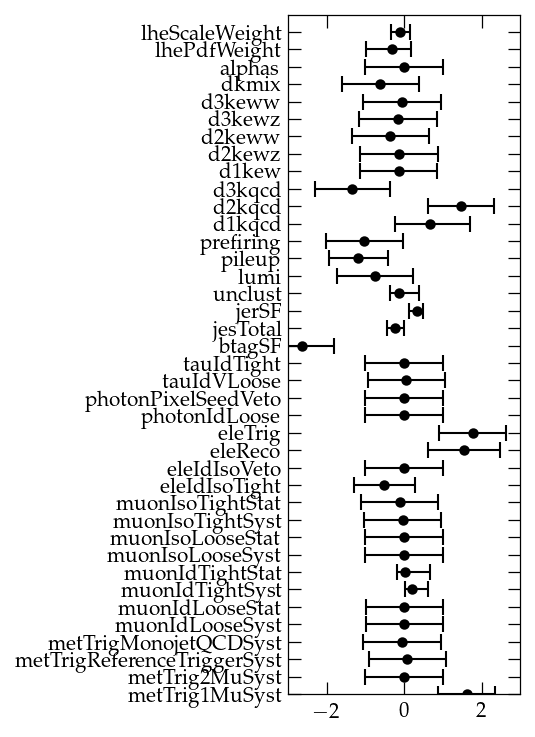

In [28]:
df = pd.DataFrame(minos_separatebins)

df = df.loc[
    df["parameter"].isin([
        "metTrig0MuSyst", "metTrig1MuSyst", "metTrig2MuSyst", "metTrigReferenceTriggerSyst", "metTrigMonojetQCDSyst",
        "muonIdLooseStat", "muonIdLooseSyst", "muonIsoLooseStat", "muonIsoLooseSyst", "muonIdTightStat", "muonIdTightSyst", "muonIsoTightStat", "muonIsoTightSyst",
        "eleIdIsoVeto", "eleIdIsoTight", "eleReco", "eleTrig", "photonIdLoose", "photonPixelSeedVeto", "tauIdVLoose", "tauIdTight", "btagSF",
        "jesTotal", "jerSF", "unclust", "lumi", "pileup", "prefiring", "d1kqcd", "d2kqcd", "d3kqcd", "d1kew", "d2kewz", "d2keww", "d3kewz", "d3keww", "dkmix",
        "alphas", "lhePdfWeight", "lheScaleWeight",
    ])
]

fig, ax = plt.subplots(
    figsize=(2, 6), dpi=150,
)

ax.errorbar(
    df["value"],
    np.arange(0., df.shape[0], 1),
    xerr=(-df["merror_down"], df["merror_up"]),
    fmt='o', color='black',
    ms=4, capsize=4,
)
ax.set_xlim(-3, 3)
ax.set_ylim(0, df.shape[0])
ax.set_yticks(np.arange(0, df.shape[0], 1))
ax.set_yticklabels([p.replace("_", " ") for p in df["parameter"]])
ax.minorticks_off()
pass

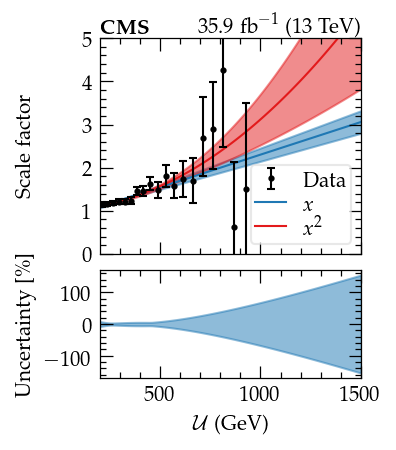

In [147]:
df = pd.DataFrame(minos_separatebins)
df = df.loc[df["parameter"].str.startswith("rQCDNorm")]
bins = np.array(list(met_bins)+[2*met_bins[-1]-met_bins[-2]])

fig, ax = plt.subplots(
    figsize=(2.25, 3), dpi=150,
    nrows=2, sharex=True,
    gridspec_kw={"height_ratios": (2, 1), "hspace": 0.1, "wspace": 0.1},
)

x = (bins[:-1]+bins[1:])/2.
y = df["value"].values
yerr_do = -1*df["merror_down"].values
yerr_up = df["merror_up"].values
ax[0].errorbar(
    x, y, yerr=(yerr_do, yerr_up),
    fmt='o', color='black',
    ms=2, label="Data",
)

import scipy.optimize
f = lambda x, p0, p1: p0+x*p1
popt, pcov = scipy.optimize.curve_fit(
    f, x, y, sigma=np.maximum(yerr_do, yerr_up), absolute_sigma=False,
)

#x_fine = np.linspace(bins.min(), bins.max(), 101)
x_fine = np.linspace(bins.min(), 1500., 101)
y_fine1 = f(x_fine, *popt)
ax[0].plot(
    x_fine, y_fine1,
    color='#1f78b4',
    zorder=-1,
    label=r'$x$',
)

import numdifftools
jac = numdifftools.Jacobian(lambda p: f(x_fine, *p))(popt)
err1 = scipy.stats.chi2.ppf(0.68, df=1)*np.sqrt(
    np.matmul(jac, np.matmul(pcov, jac.T)).diagonal()
)
ax[0].fill_between(
    x_fine, y_fine1-err1, y_fine1+err1,
    color='#1f78b4', alpha=0.5,
    zorder=-1,
)

# quadratic
f = lambda x, p0, p1, p2: p0+x*p1+x**2*p2
popt, pcov = scipy.optimize.curve_fit(
    f, x, y, sigma=np.maximum(yerr_do, yerr_up), absolute_sigma=False,
)
y_fine2 = f(x_fine, *popt)
ax[0].plot(
    x_fine, y_fine2,
    color='#e31a1c',
    zorder=-1,
    label=r'$x^2$',
)

jac = numdifftools.Jacobian(lambda p: f(x_fine, *p))(popt)
err2 = scipy.stats.chi2.ppf(0.68, df=1)*np.sqrt(
    np.matmul(jac, np.matmul(pcov, jac.T)).diagonal()
)
ax[0].fill_between(
    x_fine, y_fine2-err2, y_fine2+err2,
    color='#e31a1c', alpha=0.5,
    zorder=-1,
)

ax[1].fill_between(
    x_fine,
    -100*np.maximum(np.abs(y_fine2+err2-(y_fine1-err1)), np.abs(y_fine2-err2-(y_fine1+err1)))/y_fine1,
    100*np.maximum(np.abs(y_fine2+err2-(y_fine1-err1)), np.abs(y_fine2-err2-(y_fine1+err1)))/y_fine1,
    color='#1f78b4', alpha=0.5,
)

handles, labels = ax[0].get_legend_handles_labels()
ax[0].legend(
    [handles[idx] for idx in (2, 0, 1)],
    [labels[idx] for idx in (2, 0, 1)],
    labelspacing=0.1, borderpad=0.2,
    loc=4, fancybox=True, edgecolor='#d9d9d9',
)

dftools.draw.cms_label(ax[0], "")
ax[0].set_xlim(bins.min(), 1500.)
ax[0].set_ylim(0., 5.)
ax[0].set_ylabel(r'Scale factor')
ax[1].set_ylabel(r'Uncertainty [\%]')
ax[1].set_xlabel(r'$\mathcal{U}$ (GeV)')
fig.align_labels(ax)
fig.savefig("plots/qcd_estimation.pdf", format='pdf', bbox_inches='tight')

In [150]:
met_bin_low = np.array([
    200., 220., 250., 280., 310., 340., 370., 400., 430., 470., 510., 550., 590., 640., 690., 740., 790., 840., 900.,
    960., 1020., 1090., 1160., 1250., 1400.,
])
met_bin_upp = np.array(list(met_bin_low[1:])+[2*met_bin_low[-1]-met_bin_low[-2]])
met_bin_cent = (met_bin_low + met_bin_upp)/2.
met_bin_cent

array([ 210.,  235.,  265.,  295.,  325.,  355.,  385.,  415.,  450.,
        490.,  530.,  570.,  615.,  665.,  715.,  765.,  815.,  870.,
        930.,  990., 1055., 1125., 1205., 1325., 1475.])

In [154]:
df = pd.DataFrame(minos_separatebins)
df = df.loc[df["parameter"].str.startswith("rQCDNorm")]
bins = np.array(list(met_bins)+[2*met_bins[-1]-met_bins[-2]])


x = (bins[:-1]+bins[1:])/2.
y = df["value"].values
yerr_do = -1*df["merror_down"].values
yerr_up = df["merror_up"].values

# linear
import scipy.optimize
f = lambda x, p0, p1: p0+x*p1
popt, pcov = scipy.optimize.curve_fit(
    f, x, y, sigma=np.maximum(yerr_do, yerr_up), absolute_sigma=False,
)

x_fine = met_bin_cent
y_fine1 = f(x_fine, *popt)

import numdifftools
jac = numdifftools.Jacobian(lambda p: f(x_fine, *p))(popt)
err1 = scipy.stats.chi2.ppf(0.68, df=1)*np.sqrt(
    np.matmul(jac, np.matmul(pcov, jac.T)).diagonal()
)

# quadratic
f = lambda x, p0, p1, p2: p0+x*p1+x**2*p2
popt, pcov = scipy.optimize.curve_fit(
    f, x, y, sigma=np.maximum(yerr_do, yerr_up), absolute_sigma=False,
)
y_fine2 = f(x_fine, *popt)
ax[0].plot(
    x_fine, y_fine2,
    color='#e31a1c',
    zorder=-1,
    label=r'$x^2$',
)

jac = numdifftools.Jacobian(lambda p: f(x_fine, *p))(popt)
err2 = scipy.stats.chi2.ppf(0.68, df=1)*np.sqrt(
    np.matmul(jac, np.matmul(pcov, jac.T)).diagonal()
)

rel_unc_up = np.maximum(np.abs(y_fine2+err2-(y_fine1-err1)), np.abs(y_fine2-err2-(y_fine1+err1)))/y_fine1
rel_unc_down = np.maximum(np.abs(y_fine2+err2-(y_fine1-err1)), np.abs(y_fine2-err2-(y_fine1+err1)))/y_fine1

qcd_estimation = pd.DataFrame({
    "bin_min": met_bin_low,
    "bin_max": met_bin_upp,
    "correction": y_fine1,
    "rel_unc_up": rel_unc_up,
    "rel_unc_down": rel_unc_down,
}).set_index(["bin_min", "bin_max"])
qcd_estimation.to_hdf(
    "qcd_estimation.h5", "QCDCorrection",
    format='table', append=False,
    complevel=9, complib='zlib',
)

In [144]:
idx0 = minimizer.parameters.index("rQCDNormSR")
idx1 = minimizer.parameters.index("rZJetsToNuNu")
minimizer.np_matrix(correlation=True)[idx0, idx1]

0.27343360750564816

In [30]:
Print(popt)
print(popt + np.sqrt(pcov.diagonal()))
print(popt - np.sqrt(pcov.diagonal()))

[0.00151643 0.78500472]
[0.00173465 0.85078355]
[0.00129822 0.71922589]


## Linear fit in met distribution

In [31]:
regions = {
    "MonojetQCD": ["QCD", "ZJetsToNuNu", "WJetsToLNu", "MinorBkgs"],
    "SingleMuonQCD": ["WJetsToLNu", "MinorBkgs"],
    "SingleElectronQCD": ["WJetsToLNu", "MinorBkgs"],
}
parameters = []
for idx in range(len(met_bins)):
    parameters.extend([
        {"name": 'rQCDShape_b{}'.format(idx), "value": 0., "limit": (-100, 100), "fixed": False, "constraint": "free"},
    ])

fqcd_shapearr = (
    "np.array(["
    +",".join(["p['rQCDShape_b{}']".format(idx) for idx in range(len(met_bins))])
    +"])[:,np.newaxis]"
)
fqcd = (
    "p['rQCDNormSR']*np.ones_like(x) + "
    +"p['rQCDShapeSR']*( y * ((w.sum()) / ((y*w).sum())) - 1 ) + "
    +"{}*( (x-p['ptSRLoc']) * ((w.sum(axis=1)) / ((x*w).sum(axis=1)))[:,np.newaxis] )".format(
        fqcd_shapearr,
    )
)

scale_functions = {
    ("MonojetQCD",        "ZJetsToNuNu"): "x, y, w, p: p['rZJetsToNuNu']*np.ones_like(x)",
    ("MonojetQCD",        "WJetsToLNu"):  "x, y, w, p: p['rWJetsToLNu']*np.ones_like(x)",
    ("SingleMuonQCD",     "WJetsToLNu"):  "x, y, w, p: p['rWJetsToLNu']*np.ones_like(x)",
    ("SingleElectronQCD", "WJetsToLNu"):  "x, y, w, p: p['rWJetsToLNu']*np.ones_like(x)",
    ("MonojetQCD",        "QCD"):         "x, y, w, p: {}".format(fqcd),
}
    
config2 ={
    "regions": regions,
    "parameters": parameters + [
        {"name": "rQCDNormSR",   "value": 1.,  "limit": (0, 100),     "fixed": False, "constraint": "free"},
        {"name": "rQCDShapeSR",  "value": 0.,  "limit": (-100, 100),  "fixed": False, "constraint": "free"},
        {"name": "rZJetsToNuNu", "value": 1.,  "limit": (0, 10),      "fixed": False, "constraint": "free"},
        {"name": "rWJetsToLNu",  "value": 1.,  "limit": (0, 10),      "fixed": False, "constraint": "free"},
        {"name": "ptSRLoc",      "value": 20., "limit": (None, None), "fixed": True,  "constraint": "free"},
        
        #{"name": "metTrig0MuSyst",              "value": 0., "limit": (-3., 3.), "fixed": False, "constraint": "gaussian"},
        {"name": "metTrig1MuSyst",              "value": 0., "limit": (-10, 10), "fixed": False, "constraint": "gaussian"},
        {"name": "metTrig2MuSyst",              "value": 0., "limit": (-10, 10), "fixed": False, "constraint": "gaussian"},
        {"name": "metTrigReferenceTriggerSyst", "value": 0., "limit": (-10, 10), "fixed": False, "constraint": "gaussian"},
    ] + [
        {"name": "metTrig{}Syst".format(r), "value": 0., "limit": (-10, 10), "fixed": False, "constraint": "gaussian"}
        for r in ["MonojetQCD", "SingleMuonQCD", "DoubleMuonQCD"]
        if any(r in x for x in regions.keys())
    ] + [
        {"name": "muonIdLooseSyst",  "value": 0., "limit": (-10, 10), "fixed": False, "constraint": "gaussian"},
        {"name": "muonIdLooseStat",  "value": 0., "limit": (-10, 10), "fixed": False, "constraint": "gaussian"},
        {"name": "muonIdTightSyst",  "value": 0., "limit": (-10, 10), "fixed": False, "constraint": "gaussian"},
        {"name": "muonIdTightStat",  "value": 0., "limit": (-10, 10), "fixed": False, "constraint": "gaussian"},
        {"name": "muonIsoLooseSyst", "value": 0., "limit": (-10, 10), "fixed": False, "constraint": "gaussian"},
        {"name": "muonIsoLooseStat", "value": 0., "limit": (-10, 10), "fixed": False, "constraint": "gaussian"},
        {"name": "muonIsoTightSyst", "value": 0., "limit": (-10, 10), "fixed": False, "constraint": "gaussian"},
        {"name": "muonIsoTightStat", "value": 0., "limit": (-10, 10), "fixed": False, "constraint": "gaussian"},
        #{"name": "muonTrig",         "value": 0., "limit": (-3., 3.), "fixed": False, "constraint": "gaussian"},
        #{"name": "muonPtScale",      "value": 0., "limit": (-3., 3.), "fixed": False, "constraint": "gaussian"},
        
        {"name": "eleIdIsoTight",  "value": 0., "limit": (-10, 10), "fixed": False, "constraint": "gaussian"},
        {"name": "eleIdIsoVeto",   "value": 0., "limit": (-10, 10), "fixed": False, "constraint": "gaussian"},
        {"name": "eleReco",        "value": 0., "limit": (-10, 10), "fixed": False, "constraint": "gaussian"},
        {"name": "eleTrig",        "value": 0., "limit": (-10, 10), "fixed": False, "constraint": "gaussian"},
        #{"name": "eleEnergyScale", "value": 0., "limit": (-3., 3.), "fixed": False, "constraint": "gaussian"},
        
        {"name": "photonIdLoose",       "value": 0., "limit": (-10, 10), "fixed": False, "constraint": "gaussian"},
        {"name": "photonPixelSeedVeto", "value": 0., "limit": (-10, 10), "fixed": False, "constraint": "gaussian"},
        #{"name": "photonEnergyScale",   "value": 0., "limit": (-3., 3.), "fixed": False, "constraint": "gaussian"},
        
        {"name": "tauIdVLoose", "value": 0., "limit": (-10, 10), "fixed": False, "constraint": "gaussian"},
        {"name": "tauIdTight",  "value": 0., "limit": (-10, 10), "fixed": False, "constraint": "gaussian"},
        #{"name": "tauPtScale",  "value": 0., "limit": (-3., 3.), "fixed": False, "constraint": "gaussian"},
        {"name": "btagSF",      "value": 0., "limit": (-10, 10), "fixed": False, "constraint": "gaussian"},
        {"name": "jesTotal",    "value": 0., "limit": (-10, 10), "fixed": False, "constraint": "gaussian"},
        {"name": "jerSF",       "value": 0., "limit": (-10, 10), "fixed": False, "constraint": "gaussian"},
        {"name": "unclust",     "value": 0., "limit": (-10, 10), "fixed": False, "constraint": "gaussian"},
        
        {"name": "lumi",      "value": 0., "limit": (-10, 10), "fixed": False, "constraint": "gaussian"},
        {"name": "pileup",    "value": 0., "limit": (-10, 10), "fixed": False, "constraint": "gaussian"},
        {"name": "prefiring", "value": 0., "limit": (-10, 10), "fixed": False, "constraint": "gaussian"},
        
        {"name": "d1kqcd",         "value": 0., "limit": (-10, 10), "fixed": False, "constraint": "gaussian"},
        {"name": "d2kqcd",         "value": 0., "limit": (-10, 10), "fixed": False, "constraint": "gaussian"},
        {"name": "d3kqcd",         "value": 0., "limit": (-10, 10), "fixed": False, "constraint": "gaussian"},
        {"name": "d1kew",          "value": 0., "limit": (-10, 10), "fixed": False, "constraint": "gaussian"},
        {"name": "d2kewz",         "value": 0., "limit": (-10, 10), "fixed": False, "constraint": "gaussian"},
        {"name": "d2keww",         "value": 0., "limit": (-10, 10), "fixed": False, "constraint": "gaussian"},
        {"name": "d3kewz",         "value": 0., "limit": (-10, 10), "fixed": False, "constraint": "gaussian"},
        {"name": "d3keww",         "value": 0., "limit": (-10, 10), "fixed": False, "constraint": "gaussian"},
        {"name": "dkmix",          "value": 0., "limit": (-10, 10), "fixed": False, "constraint": "gaussian"},
        {"name": "alphas",         "value": 0., "limit": (-10, 10), "fixed": False, "constraint": "gaussian"},
        {"name": "lhePdfWeight",   "value": 0., "limit": (-10, 10), "fixed": False, "constraint": "gaussian"},
        {"name": "lheScaleWeight", "value": 0., "limit": (-10, 10), "fixed": False, "constraint": "gaussian"},
    ] + [
        {"name": "{}_mcstat_bin{}".format(r, idx), "value": 0., "limit": (-10, 10), "fixed": False, "constraint": "gamma"}
        for r in regions.keys()
        for idx in range(df_data.loc[(r,)].shape[0])
    ],
    "scale_functions": scale_functions,
}

/home/hep/sdb15/miniconda2/envs/zinv37/lib/python3.7/site-packages/ipykernel_launcher.py:99: PerformanceWarning: indexing past lexsort depth may impact performance.


In [32]:
model = dftools.fitting.NLLModel2D(df_data, df_mc, config2, same_bin_widths=True)
minimizer = model.fit()

/home/hep/sdb15/miniconda2/envs/zinv37/lib/python3.7/site-packages/pandas/core/indexing.py:1404: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)


In [33]:
%time minimizer.migrad(ncall=1_000_000)

CPU times: user 6min 34s, sys: 6.97 s, total: 6min 41s
Wall time: 6min 33s


------------------------------------------------------------------
| FCN = 3686                    |   Ncalls=92060 (92060 total)   |
| EDM = 0.000172 (Goal: 1E-05)  |            up = 1.0            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
---------------------------------------------------------------------------------------------------------------------
|    | Name                           |   Value   | Hesse Err | Minos Err- | Minos Err+ | Limit-  | Limit+  | Fixed |
---------------------------------------------------------------------------------------------------------------------
| 0  | rQCDShape_b0                   |  -0.037   |   0.004   |            |            |  -100   |   100   |       |
| 1  | rQCDShape_b1                   |  -0.033   |   0.007   |            |            |  -100   |   100   |       |
| 2  | rQCDShape_b2                   |  -0.028   |   0.011   |            |            |  -100   |   100   |       |
| 3  | rQCDShape_b3                   |  -0.013   |   0.013   |            |            |  -100   |   100   |       |
| 4  | rQCDShape_b4                   |  -0.041   |   0.016   |            |            |  -100   |   100   |       |
| 5  | rQCDShape_b5                   |  -0.022   |   0.024   |            |            |  -100   |   100   |       |
| 6  | rQCDShape_b6                   |  -0.033   |   0.029   |            |            |  -100   |   100   |       |
| 7  | rQCDShape_b7                   |  -0.004   |   0.039   |            |            |  -100   |   100   |       |
| 8  | rQCDShape_b8                   |   -0.07   |    0.04   |            |            |  -100   |   100   |       |
| 9  | rQCDShape_b9                   |   -0.08   |    0.06   |            |            |  -100   |   100   |       |
| 10 | rQCDShape_b10                  |   -0.08   |    0.08   |            |            |  -100   |   100   |       |
| 11 | rQCDShape_b11                  |   -0.23   |    0.10   |            |            |  -100   |   100   |       |
| 12 | rQCDShape_b12                  |   -0.09   |    0.13   |            |            |  -100   |   100   |       |
| 13 | rQCDShape_b13                  |   -0.09   |    0.18   |            |            |  -100   |   100   |       |
| 14 | rQCDShape_b14                  |   -0.14   |    0.20   |            |            |  -100   |   100   |       |
| 15 | rQCDShape_b15                  |   -0.62   |    0.23   |            |            |  -100   |   100   |       |
| 16 | rQCDShape_b16                  |   0.09    |   0.52    |            |            |  -100   |   100   |       |
| 17 | rQCDShape_b17                  |   0.09    |   0.27    |            |            |  -100   |   100   |       |
| 18 | rQCDShape_b18                  |    1.0    |    0.6    |            |            |  -100   |   100   |       |
| 19 | rQCDNormSR                     |   1.169   |   0.030   |            |            |    0    |   100   |       |
| 20 | rQCDShapeSR                    |   0.27    |   0.05    |            |            |  -100   |   100   |       |
| 21 | rZJetsToNuNu                   |   1.33    |   0.10    |            |            |    0    |   10    |       |
| 22 | rWJetsToLNu                    |   1.12    |   0.08    |            |            |    0    |   10    |       |
| 23 | ptSRLoc                        |   20.0    |    1.0    |            |            |         |         |  yes  |
| 24 | met

In [144]:
idx0 = minimizer.parameters.index("rQCDNormSR")
idx1 = minimizer.parameters.index("rZJetsToNuNu")
minimizer.np_matrix(correlation=True)[idx0, idx1]

0.27343360750564816

In [145]:
idx0 = minimizer.parameters.index("rQCDShapeSR")
idx1 = minimizer.parameters.index("rZJetsToNuNu")
minimizer.np_matrix(correlation=True)[idx0, idx1]

-0.21209182943201577

In [34]:
results = dftools.fitting.run_minos(
    [p for p in minimizer.parameters if not minimizer.fixed[p] and "mcstat" not in p],
    #[p for p in model.param_names if not any(x in p for x in ("mcstat", "ptSRLoc"))],
    nll_args=(df_data, df_mc, config2),
    nll_kwargs=dict(same_bin_widths=True),
    migrad_kwargs=dict(ncall=1_000_000),
    pysge_function="sge_submit",
    pysge_args=("zfit", "_ccsp_temp"),
    pysge_kwargs=dict(options="-q hep.q", dill_kw={"recurse": False}),
    params_guess=dict(minimizer.values),
    nll_class=dftools.fitting.NLLModel2D,
)

2019-10-01 11:40:57,407 - pysge.area - INFO - Creating paths in /vols/build/cms/sdb15/ZinvWidth/zinv-notebooks/notebooks/background_prediction/qcd/_ccsp_temp/tpd_20191001_114057_eebga2vv


2019-10-01 11:41:02,297 - pysge.submitter - INFO - Submitted 9963267.1-63:1


In [35]:
pd.set_option('display.max_rows', None)
pd.DataFrame(results)

,parameter,value,merror_up,merror_down,upper_valid,lower_valid
0,rQCDShape_b0,-4.267957e-02,0.004725,-0.004707,True,True
1,rQCDShape_b1,-3.682516e-02,0.009846,-0.009790,True,True
2,rQCDShape_b2,-3.684858e-02,0.011958,-0.011649,True,True
3,rQCDShape_b3,-2.678464e-02,0.015226,-0.014840,True,True
4,rQCDShape_b4,-5.772803e-02,0.019797,-0.019139,True,True
5,rQCDShape_b5,-4.430214e-02,0.024639,-0.024054,True,True
6,rQCDShape_b6,-6.153776e-02,0.035459,-0.034389,True,True
7,rQCDShape_b7,-4.113264e-02,0.044084,-0.042527,True,True
8,rQCDShape_b8,-1.025313e-01,0.045144,-0.044163,True,True
9,rQCDShape_b9,-1.351388e-01,0.069995,-0.066810,True,True


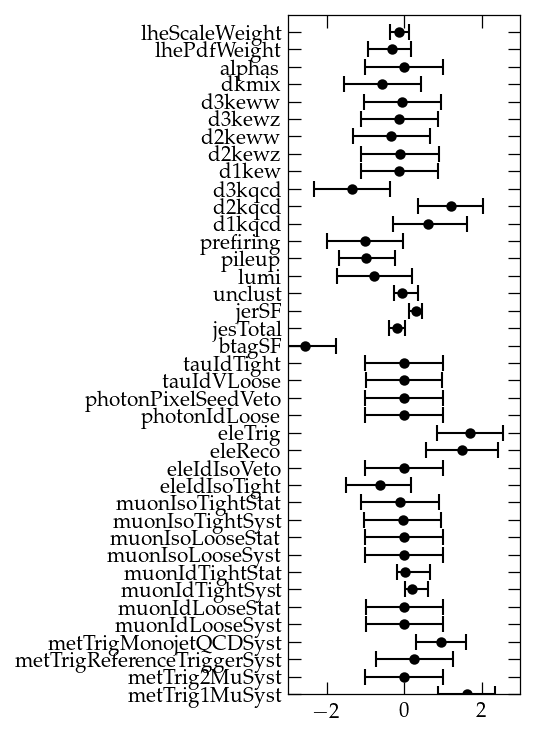

In [116]:
df = pd.DataFrame(results)

df = df.loc[
    df["parameter"].isin([
        "metTrig0MuSyst", "metTrig1MuSyst", "metTrig2MuSyst", "metTrigReferenceTriggerSyst", "metTrigMonojetQCDSyst",
        "muonIdLooseStat", "muonIdLooseSyst", "muonIsoLooseStat", "muonIsoLooseSyst", "muonIdTightStat", "muonIdTightSyst", "muonIsoTightStat", "muonIsoTightSyst",
        "eleIdIsoVeto", "eleIdIsoTight", "eleReco", "eleTrig", "photonIdLoose", "photonPixelSeedVeto", "tauIdVLoose", "tauIdTight", "btagSF",
        "jesTotal", "jerSF", "unclust", "lumi", "pileup", "prefiring", "d1kqcd", "d2kqcd", "d3kqcd", "d1kew", "d2kewz", "d2keww", "d3kewz", "d3keww", "dkmix",
        "alphas", "lhePdfWeight", "lheScaleWeight",
    ])
]

fig, ax = plt.subplots(
    figsize=(2, 6), dpi=150,
)

ax.errorbar(
    df["value"],
    np.arange(0., df.shape[0], 1),
    xerr=(-df["merror_down"], df["merror_up"]),
    fmt='o', color='black',
    ms=4, capsize=4,
)
ax.set_xlim(-3, 3)
ax.set_ylim(0, df.shape[0])
ax.set_yticks(np.arange(0, df.shape[0], 1))
ax.set_yticklabels([p.replace("_", " ") for p in df["parameter"]])
ax.minorticks_off()
pass

In [38]:
results_norm = dftools.fitting.run_impacts(
    [p for p in minimizer.parameters if not minimizer.fixed[p] and "mcstat" not in p],
    "rQCDNormSR",
    nll_args=(df_data, df_mc, config2),
    nll_kwargs=dict(same_bin_widths=True),
    migrad_kwargs=dict(ncall=100_000),
    pysge_function="sge_submit",
    pysge_args=("zfit", "_ccsp_temp"),
    pysge_kwargs=dict(options="-q hep.q -l h_vmem=12G", dill_kw={"recurse": False}),
    params_guess=dict(minimizer.values),
    nll_class=dftools.fitting.NLLModel2D,
)

2019-10-01 11:59:07,170 - pysge.area - INFO - Creating paths in /vols/build/cms/sdb15/ZinvWidth/zinv-notebooks/notebooks/background_prediction/qcd/_ccsp_temp/tpd_20191001_115907_jl8yglqa


2019-10-01 11:59:10,506 - pysge.submitter - INFO - Submitted 9963272.1-63:1


In [39]:
pd.DataFrame(results_norm)

,param,param_value,param_merrup,param_merrdown,poi,poi_paramup,poi_paramdown,valid
0,rQCDShape_b0,-4.270545e-02,0.004737,-0.004665,rQCDNormSR,-0.012689,0.015634,True
1,rQCDShape_b1,-3.682228e-02,0.009843,-0.009793,rQCDNormSR,-0.016941,0.020289,True
2,rQCDShape_b2,-3.684854e-02,0.011958,-0.011649,rQCDNormSR,-0.011037,0.013853,True
3,rQCDShape_b3,-2.678157e-02,0.015240,-0.014884,rQCDNormSR,-0.004696,0.006395,True
4,rQCDShape_b4,-5.771448e-02,0.019808,-0.019204,rQCDNormSR,-0.002594,0.003950,True
5,rQCDShape_b5,-4.431016e-02,0.024647,-0.024046,rQCDNormSR,0.001314,0.000289,True
6,rQCDShape_b6,-6.154993e-02,0.035471,-0.034377,rQCDNormSR,0.002281,-0.000809,True
7,rQCDShape_b7,-4.112902e-02,0.043968,-0.042425,rQCDNormSR,0.005134,-0.003856,True
8,rQCDShape_b8,-1.025432e-01,0.045156,-0.044151,rQCDNormSR,0.006949,-0.006997,True
9,rQCDShape_b9,-1.353946e-01,0.070451,-0.066637,rQCDNormSR,0.006145,-0.005805,True


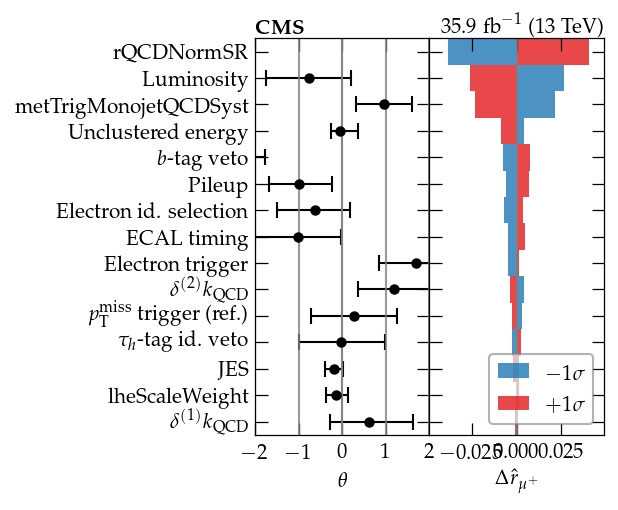

In [41]:
df = pd.DataFrame(results_norm)
df["envelope"] = np.abs(df[["poi_paramup", "poi_paramdown"]]).max(axis=1)
df = df.sort_values("envelope").reset_index(drop=True).set_index(["param", "poi"])
selection = (
    #~df.index.get_level_values("param").str.contains("mcstat")
    df.index.get_level_values("param").isin([
        "metTrig0MuSyst", "metTrig1MuSyst", "metTrig2MuSyst", "metTrigReferenceTriggerSyst", "metTrigMonojetQCDSyst",
        "muonIdLooseStat", "muonIdLooseSyst", "muonIsoLooseStat", "muonIsoLooseSyst", "muonIdTightStat", "muonIdTightSyst", "muonIsoTightStat", "muonIsoTightSyst",
        "eleIdIsoVeto", "eleIdIsoTight", "eleReco", "eleTrig", "photonIdLoose", "photonPixelSeedVeto", "tauIdVLoose", "tauIdTight", "btagSF",
        "jesTotal", "jerSF", "unclust", "lumi", "pileup", "prefiring", "d1kqcd", "d2kqcd", "d3kqcd", "d1kew", "d2kewz", "d2keww", "d3kewz", "d3keww", "dkmix",
        "alphas", "lhePdfWeight", "lheScaleWeight",
        "rQCDNormSR",
    ])
)
tdf = df.loc[selection,:].drop("envelope", axis=1).iloc[-15:]
tdf.loc[("rQCDNormSR", "rQCDNormSR"),"param_value"] = np.nan
conv = dftools.draw.nuisance_names
conv["rWJetsToLPlusNuNorm"] = r'$r_{\mu^+}$'
conv["metTrigSingleMuonPlusSyst"] = r'$p_{\mathrm{T}}^{\mathrm{miss}}$ trigger ($\mu^+ +\mathrm{jets}$)'
conv["metTrigSingleMuonMinusSyst"] = r'$p_{\mathrm{T}}^{\mathrm{miss}}$ trigger ($\mu^- +\mathrm{jets}$)'
fig, ax = dftools.draw.draw_impacts(
    tdf, converter=conv
)

ax[0].text(
    0, 1, r'$\mathbf{CMS}$', ha='left', va='bottom',
    transform=ax[0].transAxes,
)
ax[1].text(
    1, 1, r'$35.9\ \mathrm{fb}^{-1}$ ($13\ \mathrm{TeV}$)', ha='right', va='bottom',
    transform=ax[1].transAxes,
)
ax[1].set_xlabel(r'$\Delta \hat{r}_{\mu^+}$')
ax[1].legend(loc=4, fancybox=True, edgecolor="gray")
ax[0].set_xlim(-2, 2)
fig.set_size_inches(3,3.5)
fig.align_labels(ax)
#fig.savefig("plots/impacts_tfmup2munwj.pdf", format='pdf', bbox_inches='tight')

In [ ]:
results_shape = dftools.fitting.run_impacts(
    [p for p in minimizer.parameters if not minimizer.fixed[p] and "mcstat" not in p],
    "rQCDShapeSR",
    nll_args=(df_data, df_mc, config2),
    nll_kwargs=dict(same_bin_widths=True),
    migrad_kwargs=dict(ncall=100_000),
    pysge_function="sge_submit",
    pysge_args=("zfit", "_ccsp_temp"),
    pysge_kwargs=dict(options="-q hep.q -l h_vmem=12G", dill_kw={"recurse": False}),
    params_guess=list(minimizer.args),
    nll_class=dftools.fitting.NLLModel2D,
)

In [ ]:
df = pd.DataFrame(results_shape)
df["envelope"] = np.abs(df[["poi_paramup", "poi_paramdown"]]).max(axis=1)
df = df.sort_values("envelope").reset_index(drop=True).set_index(["param", "poi"])
selection = (
    #~df.index.get_level_values("param").str.contains("mcstat")
    df.index.get_level_values("param").isin([
        "metTrig0MuSyst", "metTrig1MuSyst", "metTrig2MuSyst", "metTrigReferenceTriggerSyst", "metTrigMonojetQCDSyst",
        "muonIdLooseStat", "muonIdLooseSyst", "muonIsoLooseStat", "muonIsoLooseSyst", "muonIdTightStat", "muonIdTightSyst", "muonIsoTightStat", "muonIsoTightSyst",
        "eleIdIsoVeto", "eleIdIsoTight", "eleReco", "eleTrig", "photonIdLoose", "photonPixelSeedVeto", "tauIdVLoose", "tauIdTight", "btagSF",
        "jesTotal", "jerSF", "unclust", "lumi", "pileup", "prefiring", "d1kqcd", "d2kqcd", "d3kqcd", "d1kew", "d2kewz", "d2keww", "d3kewz", "d3keww", "dkmix",
        "alphas", "lhePdfWeight", "lheScaleWeight",
        "rQCDShapeSR",
    ])
)
tdf = df.loc[selection,:].drop("envelope", axis=1).iloc[-15:]
tdf.loc[("rQCDShapeSR", "rQCDShapeSR"),"param_value"] = np.nan
conv = dftools.draw.nuisance_names
conv["rWJetsToLPlusNuNorm"] = r'$r_{\mu^+}$'
conv["metTrigSingleMuonPlusSyst"] = r'$p_{\mathrm{T}}^{\mathrm{miss}}$ trigger ($\mu^+ +\mathrm{jets}$)'
conv["metTrigSingleMuonMinusSyst"] = r'$p_{\mathrm{T}}^{\mathrm{miss}}$ trigger ($\mu^- +\mathrm{jets}$)'
fig, ax = dftools.draw.draw_impacts(
    tdf, converter=conv
)

ax[0].text(
    0, 1, r'$\mathbf{CMS}$', ha='left', va='bottom',
    transform=ax[0].transAxes,
)
ax[1].text(
    1, 1, r'$35.9\ \mathrm{fb}^{-1}$ ($13\ \mathrm{TeV}$)', ha='right', va='bottom',
    transform=ax[1].transAxes,
)
ax[1].set_xlabel(r'$\Delta \hat{r}_{\mu^+}$')
ax[1].legend(loc=4, fancybox=True, edgecolor="gray")
fig.set_size_inches(3,3.5)
fig.align_labels(ax)
#fig.savefig("plots/impacts_tfmup2munwj.pdf", format='pdf', bbox_inches='tight')

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


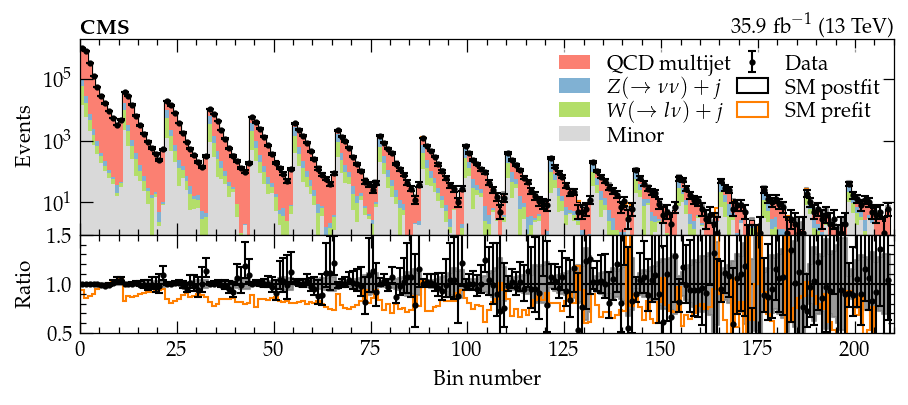

In [23]:
fig, ax = plt.subplots(
    figsize=(7, 2.6), dpi=150,
    nrows=2, ncols=1,
    sharex=True,
    gridspec_kw={
        "height_ratios": (2, 1),
        "hspace": 0., "wspace": 0.1,
    }
)
ax[0].set_yscale('log')

model.set_parameters(minimizer.np_values())
nbins = model.xobs["MonojetQCD"].shape[0]
bins = np.arange(0., nbins+1, 1)
ax[0].set_xlim(0, nbins+1)

data = model.data["MonojetQCD"]
lower, upper = dftools.stats.poisson_interval(data)
ax[0].errorbar(
    (bins[:-1] + bins[1:])/2., data,
    yerr=(data-lower, upper-data),
    fmt='o', color='black',
    ms=2, label="Data",
)

sm = model.predictions("MonojetQCD")["prediction"].values
ax[0].hist(
    bins[:-1], bins=bins, weights=sm,
    color='black', histtype='step',
    label="SM postfit",
)

ax[1].set_ylim(0, 2)
ax[1].errorbar(
    (bins[:-1] + bins[1:])/2., data/sm,
    yerr=((data-lower)/sm, (upper-lower)/sm),
    fmt='o', color='black',
    ms=2,
)

ax[1].hist(
    bins[:-1], bins=bins, weights=np.ones_like(sm),
    color='black', histtype='step',
)

mc_procs = model.prediction("MonojetQCD")
procs = model.region_procs["MonojetQCD"][::-1]
ws = [mc_procs.loc[(p,)] for p in procs]
ax[0].hist(
    [bins[:-1]]*len(procs), bins=bins,
    weights=ws, stacked=True,
    color=[dftools.draw.process_colours.get(p, 'blue') for p in procs],
    label=[dftools.draw.process_names.get(p, p) for p in procs],
)

lower, upper = dftools.fitting.confidence_interval(model, minimizer, "_predictions", "MonojetQCD")
ax[0].fill_between(
    bins, list(lower)+[lower[-1]], list(upper)+[upper[-1]],
    color='gray', zorder=-1, step='post', alpha=0.8,
)

ax[1].fill_between(
    bins, list(lower/sm)+[lower[-1]/sm[-1]], list(upper/sm)+[upper[-1]/sm[-1]],
    color='gray', zorder=-1, step='post', alpha=0.8,
)

model.set_parameters(model.param_inits)
sm_pf = model.predictions("MonojetQCD")["prediction"].values
ax[0].hist(
    bins[:-1], bins=bins, weights=sm_pf,
    color='#ff7f00', histtype='step',
    label="SM prefit", zorder=-1,
)

ax[1].hist(
    bins[:-1], bins=bins, weights=sm_pf/sm,
    color='#ff7f00', histtype='step',
)

dftools.draw.cms_label(ax[0], "")
ax[0].set_ylim(0.9, 2e6)
ax[1].set_ylim(0.5, 1.5)
ax[0].set_ylabel(r'Events')
ax[1].set_ylabel(r'Ratio')
ax[1].set_xlabel(r'Bin number')

handles, labels = ax[0].get_legend_handles_labels()
ax[0].legend(
    [handles[idx] for idx in (4, 3, 2, 1, 6, 0, 5)],
    [labels[idx] for idx in (4, 3, 2, 1, 6, 0, 5)],
    labelspacing=0.1, borderpad=0.2,
    loc=1, ncol=2, columnspacing=0.3,
)

fig.align_labels(ax)
fig.savefig("plots/postfit_qcd.pdf", format='pdf', bbox_inches='tight')
pass

/home/hep/sdb15/miniconda2/envs/zinv37/lib/python3.7/site-packages/pandas/core/indexing.py:1404: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)


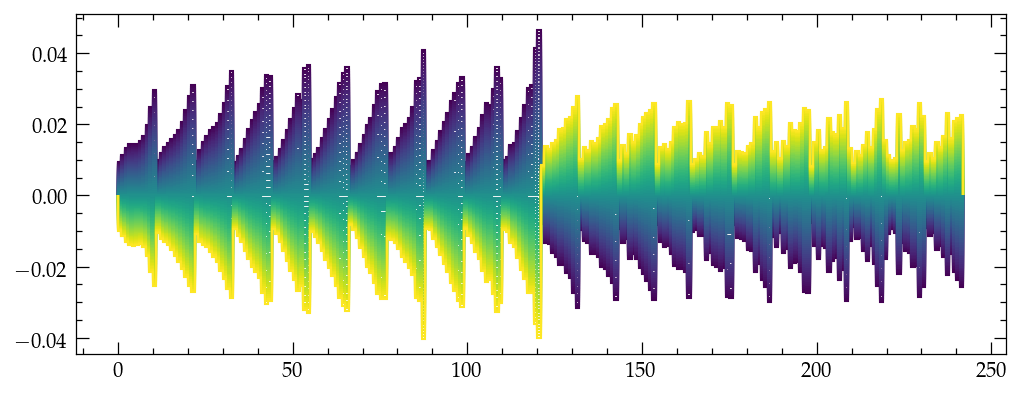

In [21]:
model = dftools.fitting.NLLModel2D(df_data, df_mc, config, same_bin_widths=True)
parameters = model.parameters

region = "MonojetQCD"
#proc = "WJetsToLnu"
nuis = "btagSF"

nom = model.predictions(region)["prediction"]
#binmin, binmax = model.bins[region]
nbins = model.bins[region][0].shape[0]
bins = np.arange(0., nbins+1, 1.)

fig, ax = plt.subplots(
    figsize=(8, 3), dpi=150,
)

ndiv = 100
cmap = plt.get_cmap('viridis', ndiv+1)

for idx, theta in enumerate(np.linspace(-1., 1., 101)):
    parameters[nuis] = theta
    model.set_parameters(parameters)
    vari = model.predictions(region)["prediction"]

    ax.hist(
        bins[:-1], bins=bins, weights=vari/nom-1,
        histtype='step', color=cmap(idx),
    )